This is a 3-part assignment. In the first part, you are asked a series of questions that will help you profile and understand the data just like a data scientist would. For this first part of the assignment, you will be assessed both on the correctness of your findings, as well as the code you used to arrive at your answer.

In the second part of the assignment, you are asked to come up with your own inferences and analysis of the data for a particular research question you want to answer. You will be required to prepare the dataset for the analysis you choose to do.

For this last part of your analysis, you are going to choose the type of analysis you want to conduct on the Yelp dataset and are going to prepare the data for analysis.

### Part 1: Yelp Dataset Profiling and Understanding

1. Profile the data by finding the total number of records for each of the tables below:

In [ ]:
i. Attribute table = 10000
ii. Business table = 10000
iii. Category table = 10000
iv. Checkin table = 10000
v. elite_years table = 10000
vi. friend table = 10000
vii. hours table = 10000
viii. photo table = 10000
ix. review table = 10000
x. tip table = 10000
xi. user table = 10000

2. Find the total distinct records by either the foreign key or primary key for each table. If two foreign keys are listed in the table, please specify which foreign key.

Note: Primary Keys are denoted in the ER-Diagram with a yellow key icon.

In [ ]:
i. Business = 10000 (id)
ii. Hours = 1562 (business_id)
iii. Category = 2643 (business_id)
iv. Attribute = 1115 (business_id)
v. Review = 10000 (id)
vi. Checkin = 493 (business_id)
vii. Photo = 10000 (id)
viii. Tip = 3979 (business_id)
ix. User = 10000 (id)
x. Friend = 11 (user_id)
xi. Elite_years = 2780 (user_id)

3. Are there any columns with null values in the Users table? Indicate "yes," or "no."

In [ ]:
Answer: no.

# SQL code used to arrive at answer:
SELECT COUNT(*)
FROM user
WHERE id IS NULL
OR name IS NULL
OR review_count IS NULL
OR yelping_since IS NULL
OR useful IS NULL
OR funny IS NULL
OR cool IS NULL
OR fans IS NULL
OR average_stars IS NULL
OR compliment_hot IS NULL
OR compliment_more IS NULL
OR compliment_profile IS NULL
OR compliment_cute IS NULL
OR compliment_list IS NULL
OR compliment_note IS NULL
OR compliment_plain IS NULL
OR compliment_cool IS NULL
OR compliment_funny IS NULL
OR compliment_writer IS NULL
OR compliment_photos IS NULL

4. For each table and column listed below, display the smallest (minimum), largest (maximum), and average (mean) value for the following fields:

In [ ]:
i. Table: Review, Column: Stars
		min:1		max:5		avg:3.7082

ii. Table: Business, Column: Stars
		min:1		max:5		avg:3.6549

iii. Table: Tip, Column: Likes
		min:0		max:2		avg:0.0144

iv. Table: Checkin, Column: Count
		min:1		max:53		avg:1.9414

v. Table: User, Column: Review_count
		min:0		max:2000	avg:24.2995

5. List the cities with the most reviews in descending order:



In [ ]:
# SQL code used to arrive at answer:
SELECT city, SUM (review_count)
FROM business
GROUP BY city
ORDER BY SUM (review_count) DESC;

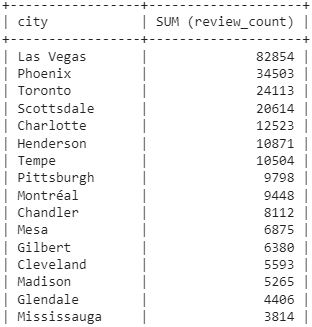

6. Find the distribution of star ratings to the business in the following cities:

In [ ]:
# i. Avon

# SQL code used to arrive at answer:

SELECT stars, SUM (review_count) AS count
FROM business
WHERE city = 'Avon'
GROUP BY stars;

# Copy and Paste the Resulting Table Below:

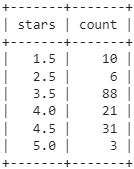

In [ ]:
# i. Beachwood

# SQL code used to arrive at answer:

SELECT stars, SUM (review_count) AS count
FROM business
WHERE city = 'Beachwood'
GROUP BY stars;

# Copy and Paste the Resulting Table Below:

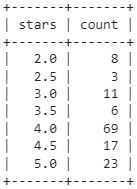

7. Find the top 3 users based on their total number of reviews:

In [ ]:
# SQL code used to arrive at answer:
SELECT name, review_count
FROM user
ORDER BY review_count DESC
LIMIT 3;

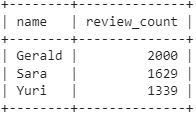

8. Does posing more reviews correlate with more fans? Please explain your findings and interpretation of the results.

> The dataset indicates that the assumption of posing more reviews correlate with more fans cannot be made.

> The results from querying top users based on total number of reviews and top users based on fans are entirely different.

> Gerald, who is the top user from number of reviews perspective with 2000 reviews, is at 4th place when comes to fan count, of 253 fans.

> Amy, who has the most number of fans, of 503, only provided 609 reviews, a 30% less reviews than Gerald.

9. Are there more reviews with the word "love" or with the word "hate" in them?

> Answer: Yes, there are 1780 reviews with the word "love", whilst only 232 reviews with the word "hate".

In [ ]:
# SQL code used to arrive at answer:
SELECT COUNT(id) AS love_reviews,
    (SELECT COUNT(id)
    FROM review
    WHERE text LIKE '%hate%') AS hate_reviews
FROM review
WHERE text LIKE '%love%';

10. Find the top 10 users with the most fans:

In [ ]:
# SQL code used to arrive at answer:

SELECT name, fans
FROM user
ORDER BY fans DESC
LIMIT 10;

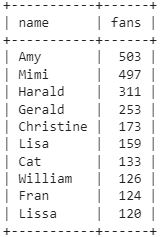



---



### Part 2: Yelp Dataset Profiling and Understanding

1. Pick one <b>city</b> and <b>category</b> of your choice and group the businesses in that city or category by their overall star rating. Compare the businesses with 2-3 stars to the businesses with 4-5 stars and answer the following questions.



i. Do the two groups you chose to analyze have a different distribution of hours?


> Las Vegas and Restaurants were my chosen parameters for this task.

> The three restaurants resulting from the query do share similarity in terms of all are open from Monday through to Sunday. However, there are small differences when observing their operating hours.

> The restaurant under 2-3 stars grouping has the opening hours of 11.00-0.00, whilst the ones above 4 stars, though open at roughly the same time, tend to finish up earlier.

> Interestingly on Sunday, a restaurant of between 4-5 stars opens at least two hours before others and operates for six hours before closing up - that is half the operating hours compared to the other restaurants.

> It is important to note that this is an observation from a small sample size.


ii. Do the two groups you chose to analyze have a different number of reviews?

> Yes, the average number of reviews received by a restaurant of between 4-5 stars is almost 4x than that of 2-3 stars.

iii. Are you able to infer anything from the location data provided between these two groups? Explain.

> Unfortunately, no. The three restaurants are from different postcode. In addition, two appears to be from different neighbourhood whilst this data is missing from the last restaurant.

In [ ]:
# SQL code used for analysis:

SELECT h.hours, b.name, b.review_count, b.postal_code, b.neighborhood,
    CASE
        WHEN b.stars >= 2 AND b.stars < 4 THEN '2-3 stars'
        WHEN b.stars >= 4 THEN '4-5 stars'
        ELSE 'Others'
        END 'stars_grouping',
    CASE
        WHEN hours LIKE 'Monday%' THEN '1'
        WHEN hours LIKE 'Tuesday%' THEN '2'
        WHEN hours LIKE 'Wednesday%' THEN '3'
        WHEN hours LIKE 'Thursday%' THEN '4'
        WHEN hours LIKE 'Friday%' THEN '5'
        WHEN hours LIKE 'Saturday%' THEN '6'
        WHEN hours LIKE 'Sunday%' THEN '7'
        END 'ord'
FROM business b
JOIN category c ON b.id=c.business_id
JOIN hours h ON b.id=h.business_id
WHERE city = 'Las Vegas'
    AND category = 'Restaurants'
ORDER BY ord, stars_grouping ASC;

2. Group business based on the ones that are open and the ones that are closed. What differences can you find between the ones that are still open and the ones that are closed? List at least two differences and the SQL code you used to arrive at your answer.

i. Difference 1: Average reviews.

> The average number of reviews received by the a business who is still running is around 35% more than the one that has shut down.
         
         


ii. Difference 2: Average star rating.
> A business that is still trading is likely to have a higher average star rating than the closed ones.

In [ ]:
# SQL code used for analysis:

SELECT is_open, COUNT(DISTINCT(id)) AS number_of_business,
			   AVG(review_count) AS average_reviews,
			   AVG(stars) AS average_stars
FROM business
GROUP BY is_open;



---



### Part 3. For this last part of your analysis, you are going to choose the type of analysis you want to conduct on the Yelp dataset and are going to prepare the data for analysis.

i. Indicate the type of analysis you chose to do:

> I wanted to know if there is a correlation between some attributes of the reviews for Restaurants category and if they can be used to predict the level of feedback (useful, cool, or funny) a future review might receive.

ii. Write 1-2 brief paragraphs on the type of data you will need for your analysis and why you chose that data:

> On a top level, I will need the information from the review table mostly. However, I'll filter only for the reviews that are made for Restaurants.
Once I have that, I started with creating review attributes. Those include word count, if the review contains a dollar sign, or a phrase must try or if you.

> The reason I chose those attributes is that I believe they convey a recommendation or direction, especially the phrases 'must try' or 'if you', that might lead to a reader to find the review useful or cool.
As for whether or not a dollar sign is part of the review, I am trying to understand whether sharing information about food price would lead to a review being found useful.
Lastly, I'd like to understand if word count relates to how well-received the review is.

iii. Output of your finished dataset:
(Please note I purposely removed the text column as this won't fit on the screen)

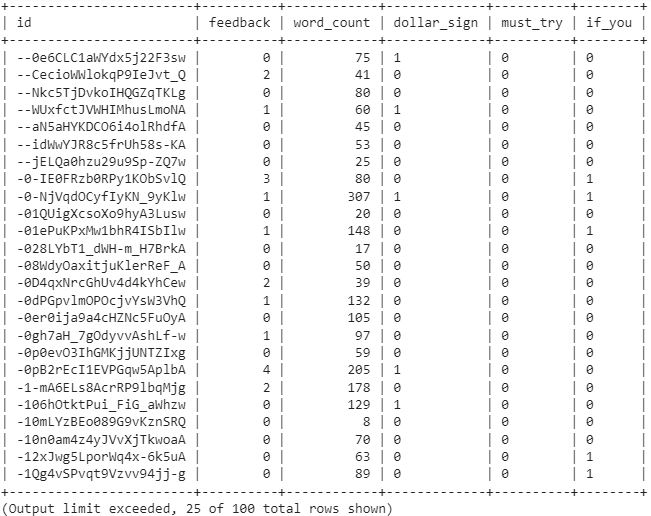

iv. Provide the SQL code you used to create your final dataset:
(Please note I purposely removed the text column as this won't fit on the screen)

In [ ]:
SELECT r.id, (r.useful+r.cool+r.funny) AS feedback, length(r.text) - length(replace(r.text,' ','')) + 1 AS word_count,
	CASE
		WHEN text LIKE '%$%' THEN '1'
		ELSE '0'
		END 'dollar_sign',
	CASE
		WHEN text LIKE '%must try%' THEN '1'
		ELSE '0'
		END 'must_try',
	CASE
		WHEN text LIKE '%if you%' THEN '1'
		ELSE '0'
		END 'if_you'
FROM review r
LEFT JOIN business b ON r.business_id=b.id
LEFT JOIN category c ON r.business_id=c.business_id
WHERE c.category = 'Restaurants'
GROUP BY r.id
;